In [102]:
!pip install -r requirements.txt

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [104]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         70736 non-null  object 
 1   PatientId       70736 non-null  float64
 2   AppointmentID   70736 non-null  int64  
 3   Gender          70736 non-null  object 
 4   ScheduledDay    70736 non-null  object 
 5   AppointmentDay  70736 non-null  object 
 6   Age             70736 non-null  int64  
 7   Neighbourhood   70736 non-null  object 
 8   Scholarship     70736 non-null  int64  
 9   Hipertension    70736 non-null  int64  
 10  Diabetes        70736 non-null  int64  
 11  Alcoholism      70736 non-null  int64  
 12  Handcap         70736 non-null  int64  
 13  SMS_received    70736 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.6+ MB


In [106]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1.148623e+12,5626410,F,2016-04-27T08:11:53Z,2016-05-12T00:00:00Z,33,SANTA TEREZA,1,0,0,0,0,1
1,No,7.571264e+12,5636042,F,2016-04-28T14:27:39Z,2016-05-19T00:00:00Z,87,JARDIM CAMBURI,0,0,0,0,0,0
2,No,5.821357e+13,5741878,F,2016-05-30T07:31:41Z,2016-05-30T00:00:00Z,4,CENTRO,0,0,0,0,0,0
3,No,3.615133e+13,5598185,F,2016-04-19T07:20:09Z,2016-05-03T00:00:00Z,63,SANTA TEREZA,0,0,0,0,0,1
4,Yes,3.484576e+10,5669000,F,2016-05-06T10:07:39Z,2016-05-06T00:00:00Z,29,SÃO PEDRO,0,0,0,0,0,0


In [107]:
#Cambio il valore di patientId da float a int
train['PatientId'] = train['PatientId'].astype('int64')
test['PatientId'] = test['PatientId'].astype('int64')

train.PatientId.value_counts().head()

822145925426128    54
99637671331        54
33534783483176     49
26886125921145     47
6264198675331      44
Name: PatientId, dtype: int64

In [108]:
#Visto che la colonna PatientId presenta molti duplicati per ogni valore procedo ad eliminarli.
train.drop_duplicates(subset='PatientId', keep="last")
test.drop_duplicates(subset='PatientId', keep="last")

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1815661444119,5595969,M,2016-04-18T13:44:47Z,2016-05-04T00:00:00Z,53,JUCUTUQUARA,0,0,0,0,0,1
2,No,27735777211883,5731276,F,2016-05-24T09:47:12Z,2016-06-07T00:00:00Z,51,SANTA MARTHA,0,1,0,0,0,1
3,No,871558761696659,5630016,M,2016-04-27T14:33:27Z,2016-05-10T00:00:00Z,35,GURIGICA,0,0,0,0,0,1
4,No,66745837288726,5749973,F,2016-05-31T08:24:59Z,2016-06-01T00:00:00Z,52,SÃO CRISTÓVÃO,0,0,0,0,0,0
8,No,2967257287253,5715255,M,2016-05-18T13:57:20Z,2016-05-18T00:00:00Z,41,JARDIM CAMBURI,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,No,77498576327146,5763134,M,2016-06-02T08:35:26Z,2016-06-03T00:00:00Z,22,ILHA DO BOI,0,0,0,0,0,0
17681,No,6271714618169,5695747,F,2016-05-13T10:52:46Z,2016-05-13T00:00:00Z,0,SANTA CLARA,0,0,0,0,0,0
17682,No,53677366991344,5704445,M,2016-05-16T15:44:26Z,2016-05-17T00:00:00Z,16,SÃO PEDRO,1,0,0,0,0,0
17683,No,1442674267939,5619865,F,2016-04-26T08:25:00Z,2016-05-03T00:00:00Z,52,ILHA DE SANTA MARIA,0,1,1,0,0,1


In [109]:
#Trasformo il valore di ScheduleDay da stringa a daytime
train['ScheduledDay'] = pd.to_datetime(train['ScheduledDay'], format="%Y-%m-%d")
test['ScheduledDay'] = pd.to_datetime(test['ScheduledDay'],  format="%Y-%m-%d")

In [110]:
#Trasformo il valore di AppointmentDay da stringa a daytime

train['AppointmentDay'] = pd.to_datetime(train['AppointmentDay'], format="%Y-%m-%d")
test['AppointmentDay'] = pd.to_datetime(test['AppointmentDay'],  format="%Y-%m-%d")

len(train[train["AppointmentDay"] < train["ScheduledDay"]])

24720

In [111]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1148623153243,5626410,F,2016-04-27 08:11:53+00:00,2016-05-12 00:00:00+00:00,33,SANTA TEREZA,1,0,0,0,0,1
1,No,7571264235515,5636042,F,2016-04-28 14:27:39+00:00,2016-05-19 00:00:00+00:00,87,JARDIM CAMBURI,0,0,0,0,0,0
2,No,58213572327266,5741878,F,2016-05-30 07:31:41+00:00,2016-05-30 00:00:00+00:00,4,CENTRO,0,0,0,0,0,0
3,No,36151331336292,5598185,F,2016-04-19 07:20:09+00:00,2016-05-03 00:00:00+00:00,63,SANTA TEREZA,0,0,0,0,0,1
4,Yes,34845756514,5669000,F,2016-05-06 10:07:39+00:00,2016-05-06 00:00:00+00:00,29,SÃO PEDRO,0,0,0,0,0,0


In [112]:
#Dalla stampa delle prime colonne del dataset mi accorgo che il campo AppointmentDay ha il valore associato all'ora 
#uguale per tutti i valori a 0. Assegno perciò un timeDelta.
train['AppointmentDay'] = train['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')
test['AppointmentDay'] = test['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [113]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1148623153243,5626410,F,2016-04-27 08:11:53+00:00,2016-05-12 23:59:59+00:00,33,SANTA TEREZA,1,0,0,0,0,1
1,No,7571264235515,5636042,F,2016-04-28 14:27:39+00:00,2016-05-19 23:59:59+00:00,87,JARDIM CAMBURI,0,0,0,0,0,0
2,No,58213572327266,5741878,F,2016-05-30 07:31:41+00:00,2016-05-30 23:59:59+00:00,4,CENTRO,0,0,0,0,0,0
3,No,36151331336292,5598185,F,2016-04-19 07:20:09+00:00,2016-05-03 23:59:59+00:00,63,SANTA TEREZA,0,0,0,0,0,1
4,Yes,34845756514,5669000,F,2016-05-06 10:07:39+00:00,2016-05-06 23:59:59+00:00,29,SÃO PEDRO,0,0,0,0,0,0


In [114]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1148623153243,5626410,F,2016-04-27 08:11:53+00:00,2016-05-12 23:59:59+00:00,33,SANTA TEREZA,1,0,0,0,0,1
1,No,7571264235515,5636042,F,2016-04-28 14:27:39+00:00,2016-05-19 23:59:59+00:00,87,JARDIM CAMBURI,0,0,0,0,0,0
2,No,58213572327266,5741878,F,2016-05-30 07:31:41+00:00,2016-05-30 23:59:59+00:00,4,CENTRO,0,0,0,0,0,0
3,No,36151331336292,5598185,F,2016-04-19 07:20:09+00:00,2016-05-03 23:59:59+00:00,63,SANTA TEREZA,0,0,0,0,0,1
4,Yes,34845756514,5669000,F,2016-05-06 10:07:39+00:00,2016-05-06 23:59:59+00:00,29,SÃO PEDRO,0,0,0,0,0,0


In [115]:
#Controllo i valori di età per vedere se non ci sono errori di battitura nel dataset.
np.sort(train['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [116]:
#Controllo per sicurezza che non ci siano valori negativi, cosa che sarebbe impossibile.
train[train['Age'] == -1].count()['Age']

0

In [117]:
#Conto i valori della feature Gender per vedere quanto ammonta la suddivisione
train['Gender'].value_counts()

F    45907
M    24829
Name: Gender, dtype: int64

In [118]:
#Ora vedo quali tra maschio e femmina sono più propensi a rifiutare gli appuntamenti
gender_counts = train.groupby(['Gender', 'No-show']).count()['Age']
gender_counts

Gender  No-show
F       No         36507
        Yes         9400
M       No         19895
        Yes         4934
Name: Age, dtype: int64

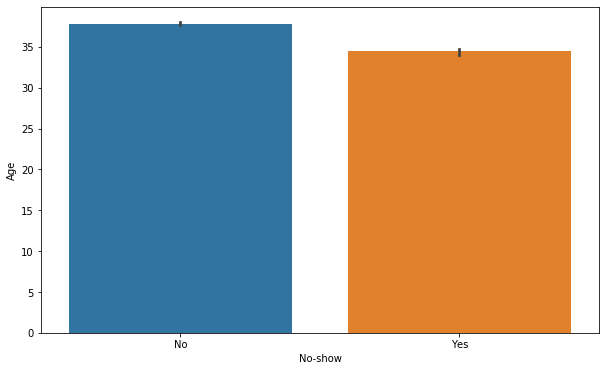

In [119]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'No-show', y = 'Age', data = train)

In [120]:
#Creo una nuova features chiamato AgeClass in cui classifico ogni paziente in base alla sua età
def ageRange (x):
    if x < 0 : return 'nonNato'
    elif x >=0 and x < 6 : return 'Infanzia'
    elif x >=6 and x < 12 : return 'Infanziabis'
    elif x >=12 and x < 14 : return 'Adolescienza'
    elif x >=14 and x < 27 : return 'Gioventù'
    elif x >=27 and x < 60 : return 'Adulto'
    else: return 'Anziano'

train['AgeClass']= train['Age'].apply(ageRange)
test['AgeClass']= train['Age'].apply(ageRange)


In [121]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AgeClass
0,No,1148623153243,5626410,F,2016-04-27 08:11:53+00:00,2016-05-12 23:59:59+00:00,33,SANTA TEREZA,1,0,0,0,0,1,Adulto
1,No,7571264235515,5636042,F,2016-04-28 14:27:39+00:00,2016-05-19 23:59:59+00:00,87,JARDIM CAMBURI,0,0,0,0,0,0,Anziano
2,No,58213572327266,5741878,F,2016-05-30 07:31:41+00:00,2016-05-30 23:59:59+00:00,4,CENTRO,0,0,0,0,0,0,Infanzia
3,No,36151331336292,5598185,F,2016-04-19 07:20:09+00:00,2016-05-03 23:59:59+00:00,63,SANTA TEREZA,0,0,0,0,0,1,Anziano
4,Yes,34845756514,5669000,F,2016-05-06 10:07:39+00:00,2016-05-06 23:59:59+00:00,29,SÃO PEDRO,0,0,0,0,0,0,Adulto


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   No-show         70736 non-null  object             
 1   PatientId       70736 non-null  int64              
 2   AppointmentID   70736 non-null  int64              
 3   Gender          70736 non-null  object             
 4   ScheduledDay    70736 non-null  datetime64[ns, UTC]
 5   AppointmentDay  70736 non-null  datetime64[ns, UTC]
 6   Age             70736 non-null  int64              
 7   Neighbourhood   70736 non-null  object             
 8   Scholarship     70736 non-null  int64              
 9   Hipertension    70736 non-null  int64              
 10  Diabetes        70736 non-null  int64              
 11  Alcoholism      70736 non-null  int64              
 12  Handcap         70736 non-null  int64              
 13  SMS_received    70736 non-null 

In [123]:
#Creo una nuova features chiamata Waiting ovvero tempo di attesa in cui inserisco come valore la differenza
#tra il giorno dell'appuntamento e il giorno dello schedule.
train["Waiting"] = (train.AppointmentDay - train.ScheduledDay).dt.days
test["Waiting"] = (test.AppointmentDay - test.ScheduledDay).dt.days
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AgeClass,Waiting
0,No,1148623153243,5626410,F,2016-04-27 08:11:53+00:00,2016-05-12 23:59:59+00:00,33,SANTA TEREZA,1,0,0,0,0,1,Adulto,15
1,No,7571264235515,5636042,F,2016-04-28 14:27:39+00:00,2016-05-19 23:59:59+00:00,87,JARDIM CAMBURI,0,0,0,0,0,0,Anziano,21
2,No,58213572327266,5741878,F,2016-05-30 07:31:41+00:00,2016-05-30 23:59:59+00:00,4,CENTRO,0,0,0,0,0,0,Infanzia,0
3,No,36151331336292,5598185,F,2016-04-19 07:20:09+00:00,2016-05-03 23:59:59+00:00,63,SANTA TEREZA,0,0,0,0,0,1,Anziano,14
4,Yes,34845756514,5669000,F,2016-05-06 10:07:39+00:00,2016-05-06 23:59:59+00:00,29,SÃO PEDRO,0,0,0,0,0,0,Adulto,0


In [124]:
print(train.groupby("Waiting").size())

Waiting
-6          1
-1          1
 0      24718
 1       3295
 2       4330
        ...  
 155        7
 162        9
 169        6
 176       10
 179        8
Length: 125, dtype: int64


In [125]:
#Ci sono alcuni valori negativi, questi corrispondo a degli errori in cui il giorno dello schedule avviene
#dopo il giorno dell'appuntamento.Cancello perciò le ennuple corrispondenti a tale valore.
train.drop( train[train.Waiting == -1].index, inplace=True)
train.drop( train[train.Waiting == -6].index, inplace=True)

test.drop( test[test.Waiting == -1].index, inplace=True)
test.drop( test[test.Waiting == -6].index, inplace=True)

In [126]:
#Mapping dei valori di No-show
mapping={'No': 0, 'Yes' : 1}
train['No-show'] = train['No-show'].map(mapping)
test['No-show'] = test['No-show'].map(mapping)

#Mapping dei valori di Handicap considerando che sia importante solo la distinzione tra il valore 0(no handicap) e
#un valore >0(Handicap)
mapping={0:0, 1:1, 2:1, 3:1, 4:1}
train['Handcap'] = train['Handcap'].map(mapping)
test['Handcap'] = test['Handcap'].map(mapping)

In [127]:
#Mapping di AgeClass
mapping={'nonNato': 0, 'Infanzia' : 1, 'Infanziabis' : 2, 'Adolescienza' : 3, 'Gioventù' : 4, 'Adulto' : 5, 'Anziano' : 6}
train['AgeClass'] = train['AgeClass'].map(mapping)
test['AgeClass'] = test['AgeClass'].map(mapping)

#Mapping di Gender
mapping={'F': 0, 'M' : 1}
train['Gender'] = train['Gender'].map(mapping)
test['Gender'] = test['Gender'].map(mapping)

In [128]:
#Encoder di ScheduledDay, AppointmentDay, Neighbourhood
Encoder_X = LabelEncoder() 
train["ScheduledDay"] = Encoder_X.fit_transform(train["ScheduledDay"])
test["ScheduledDay"] = Encoder_X.fit_transform(test["ScheduledDay"])

train["AppointmentDay"] = Encoder_X.fit_transform(train["AppointmentDay"])
test["AppointmentDay"] = Encoder_X.fit_transform(test["AppointmentDay"])
 
train["Neighbourhood"] = Encoder_X.fit_transform(train["Neighbourhood"])
test["Neighbourhood"] = Encoder_X.fit_transform(test["Neighbourhood"])

In [129]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AgeClass,Waiting
0,0,1148623153243,5626410,0,12981,9,33,67,1,0,0,0,0,1,5,15
1,0,7571264235515,5636042,0,15360,15,87,38,0,0,0,0,0,0,6,21
2,0,58213572327266,5741878,0,55568,19,4,10,0,0,0,0,0,0,1,0
3,0,36151331336292,5598185,0,7984,2,63,67,0,0,0,0,0,1,6,14
4,1,34845756514,5669000,0,28787,5,29,77,0,0,0,0,0,0,5,0


In [130]:
print(train.groupby("Waiting").size())
train.head()

Waiting
0      24718
1       3295
2       4330
3       1764
4       3363
       ...  
155        7
162        9
169        6
176       10
179        8
Length: 123, dtype: int64


,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AgeClass,Waiting
0,0,1148623153243,5626410,0,12981,9,33,67,1,0,0,0,0,1,5,15
1,0,7571264235515,5636042,0,15360,15,87,38,0,0,0,0,0,0,6,21
2,0,58213572327266,5741878,0,55568,19,4,10,0,0,0,0,0,0,1,0
3,0,36151331336292,5598185,0,7984,2,63,67,0,0,0,0,0,1,6,14
4,1,34845756514,5669000,0,28787,5,29,77,0,0,0,0,0,0,5,0


In [131]:
y_train = train["No-show"]
x_train = train.drop(['No-show', 'AppointmentDay','AppointmentID','ScheduledDay','Age'], axis=1)

y_test = test["No-show"]
x_test = test.drop(['No-show', 'AppointmentDay','AppointmentID','ScheduledDay','Age'], axis=1)

In [132]:
from sklearn.metrics import accuracy_score

logic = LogisticRegression(random_state=0, max_iter=1000)
logic.fit(x_train, y_train)
y_pred = logic.predict(x_test)

MYaccurancy=round(accuracy_score(y_test, y_pred) * 100,2)
print("La mia accuracy è:")
print(MYaccurancy)

La mia accuracy è:
79.94
